<h1 align="center"><font size=6>CS545: Machine Learning Project</h1>

<h1 align="center"><font size=6>Project Title: Classification of Vehicles using Convolutional Neural Networks</h1>

<font size=4>**Jaya Vignesh Balakrishnan**<br>
**Kirankumar Raveendiran**<br>
**December 14, 2021**</font>

## Introduction
---

In this project, we are doing **Image Classification using Convolutional Neural Networks** where we have also employed **Data Augmentation** on the downloaded vehicle dataset which allows us to artificially expand the size of the dataset loaded for training by creating modified versions of images in the dataset hoping that the augmented images in the dataset will fetch us good performance on the CNN model implemented below. The motivation behind our project idea is the homework assignment A3 where we applied our Neural Network Classifier class model to classify the MNIST Handwritten Digits Dataset.

The idea behind this project is to make the machines classify objects like how humans do upon visualization. Though image classification sounds very interesting, but yet it is a challenging topic to address. In this project, we have used the concepts of convolutional neural networks and data augmentation to classify the vehicles of five different classes namely Bicycle, Bus, Car, Motorcycle and Van. The dataset that we have used in this project was intended for TAU Vehicle Type Recognition Competition conducted two years ago. The actual dataset that we have used consists of vehicles from altogether 17 classes: Ambulance, Boat, Cart, Limousine, Snowmobile, Truck, Barge, Bus, Caterpillar, Motorcycle, Tank, Van, Bicycle, Car, Helicopter, Segway and Taxi. Due to memory-related constraints, we made few modifications in the dataset and considered only five classes of vehicles for classification.

We have taken the Vehicle Recognition dataset from Kaggle which consists of 8582 number of images from five different classes - Bicycle, Bus, Car, Motorcycle and Van for training the CNN model. There are:

* 1206 images of Bicycle
* 1181 images of Bus
* 3426 images of Car
* 1667 images of Motorcycle
* 1102 images of Van

In addition to this, a test dataset that consists of 1810 images from five different classes - Bicycle, Bus, Car, Motorcycle and Van has been used for classification purpose.

For making the classification in 1D these images are labelled in this way: [0 0 0 0 0] where each of the five image label depicts five different classes of vehicles:

IF Bicycle = [1 0 0 0 0]

IF Bus = [0 1 0 0 0]

IF Car = [0 0 1 0 0]

IF Motorcycle = [0 0 0 1 0]

IF Van = [0 0 0 0 1]


### Data & Code Source:
---

We have taken the dataset from Kaggle and the reference codes from Github:

Link 1: [TAU Vehicle Type Recognition Dataset](https://www.kaggle.com/c/vehicle/data?select=sample_submission.csv)

Link 2: https://github.com/davidbrai/deep-learning-traffic-lights

Link 3: https://github.com/harish3110/SDCND-P2-Traffic_Sign_Classifier

## Methods
---

### Teammates Contributions

#### i) Jaya Vignesh Balakrishnan: 

1) Identified and Downloaded the right-kind of vehicle recognition dataset from Kaggle and also made the necessary modifications on the dataset for usage in this project.

2) Implementation of the CNN model and testing the same for different optimizer functions, learning rates and loss functions in order to get best plausible validation and test accuracies.

#### ii) Kirankumar Raveendiran:

1) Collection of reference codes from GitHub for usage in this project.

2) Worked on the standardization of the images, creation of train, validation and test images partition, and augmentation of the images for usage in this project.

#### iii) Combined Effort:

1) Writing observations and project report.

2) Worked on reducing the misclassification of the vehicle classes considered for classification.

In [1]:
import cv2
import random as rand
import imutils
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg    # for loading in images
import tensorflow as tf
import pathlib
from tensorflow import keras
from imutils import paths
from keras import Sequential
import os
import glob

%matplotlib inline

The function `load_dataset` loads in images and their labels and places them in a list

The list contains all images and their associated labels

For example, after data is loaded, im_list[0][:] will be the first image-label pair in the list

In [2]:
def load_dataset(image_dir):
    
    # Populate this empty image list
    im_list = []
    image_types = ["Bicycle", "Bus", "Car", "Motorcycle", "Van"]
    
    # Iterate through each vehicle folder
    for im_type in image_types:
        
        # Iterate through each image file in each image_type folder
        # glob reads in any image with the extension "image_dir/im_type/*"
        for file in glob.glob(os.path.join(image_dir, im_type, "*")):
            
            # Read in the image
            im = mpimg.imread(file)
            
            # Check if the image exists/if it's been correctly read-in
            if not im is None:
                # Append the image, and it's type (Bicycle, Bus, Car, Motorcycle, Van) to the image list
                im_list.append((im, im_type))
                
    return im_list

### Train Data

All 8582 images that belongs five different classes of vehicles namely Bicycle, Bus, Car, Motorcycle and Van are placed in train_data: the directory where all our training images are stored.

In [3]:
train_data = "C:/Users/kiran/Downloads/train/"

Store data in a variable [IMAGE_LIST]

IMAGE_LIST = [0][ ]  = > [0] -> the image number & [ ] -> Label of the image if  [Bicycle, Bus, Car, Motorcycle, Van].

The `load_dataset` function takes in the name of an image directory and returns a list of images and 
their associated labels. 

For example, the first image-label pair in [IMAGE_LIST] can be accessed by index: 
``` IMAGE_LIST[0][:]```.

In [4]:
IMAGE_LIST = load_dataset(train_data)
print("There are {} images in all.".format(len(IMAGE_LIST)))

There are 8582 images in all.


The shape of the selected image: (1811, 2777, 3).
The label of the selected image: Bicycle.


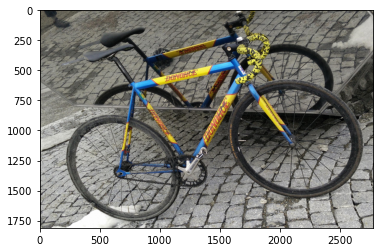

In [5]:
selected_image = IMAGE_LIST[100][0]
plt.imshow(selected_image)
print("The shape of the selected image: {}.".format(selected_image.shape))
print("The label of the selected image: {}.".format(IMAGE_LIST[100][1]))

The shape of the selected image: (1495, 3277, 3).
The label of the selected image: Car.


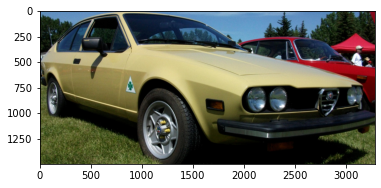

In [6]:
selected_image = IMAGE_LIST[2400][0]
plt.imshow(selected_image)
print("The shape of the selected image: {}.".format(selected_image.shape))
print("The label of the selected image: {}.".format(IMAGE_LIST[2400][1]))

The shape of the selected image: (2244, 3393, 3).
The label of the selected image: Car.


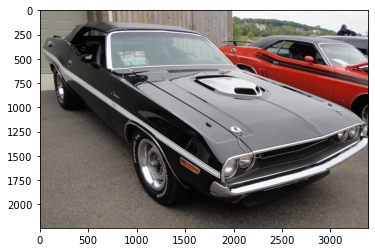

In [7]:
selected_image = IMAGE_LIST[3700][0]
plt.imshow(selected_image)
print("The shape of the selected image: {}.".format(selected_image.shape))
print("The label of the selected image: {}.".format(IMAGE_LIST[3700][1]))

### Standardization of the input images:

It's very common to have square input sizes. To standardize it's important to make all your images the same size so that they can be sent through the same code of classification steps.

In [8]:
# This function should take in an image and return a new, standardized version
def standardize_input(image):
    
    ## DONE: Resize image and pre-process so that all "standard" images are the same size  
    standard_im = np.copy(image)
    standard_im = cv2.resize(standard_im, (128, 128))
    
    return standard_im

The shape of the standardized image: (128, 128, 3).


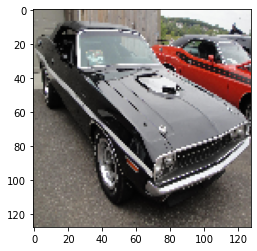

In [9]:
# Example test for Standardization.
standardized_image = standardize_input(selected_image)
print("The shape of the standardized image: {}.".format(standardized_image.shape))
plt.imshow(standardized_image)

***To create label encoder***

Given a label - "Bicycle", "Bus", "Car", "Motorcycle" and "Van" - return a label_encoded

If label_encoded("Bicycle") should return: [1, 0, 0, 0, 0]

If label_encoded("Bus") should return: [0, 1, 0, 0, 0]

If label_encoded("Car") should return: [0, 0, 1, 0, 0]

If label_encoded("Motorcycle") should return: [0, 0, 0, 1, 0]

If label_encoded("Van") should return: [0, 0, 0, 0, 1]

In [94]:
def label_encode(label):
    
    ## DONE: Create a one-hot encoded label that works for all classes of vehicles
    label_encoded = [0, 0, 0, 0, 0]
    if label == "Bicycle":
        label_encoded[0] = 1
    elif label == "Bus":
        label_encoded[1] = 1
    elif label == "Car":
        label_encoded[2] = 1
    elif label == "Motorcycle":
        label_encoded[3] = 1
    else:
        label_encoded[4] = 1
    
    return label_encoded

# test
print(label_encode("Bicycle"))
print(label_encode("Bus"))
print(label_encode("Car"))
print(label_encode("Motorcycle"))
print(label_encode("Van"))

[1, 0, 0, 0, 0]
[0, 1, 0, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 0, 1, 0]
[0, 0, 0, 0, 1]


### Test function

To test the above code we need a test code which we are taking from the above mentioned GitHub links i.e, traffic sign detector test code and modifying for the classification of vehicle classes.

In [95]:
# All test code
import unittest
from IPython.display import Markdown, display
# for printing markdown text (text in color/bold/etc)
def printmd(string):
    display(Markdown(string))

# Print a test failed message, given an error
def print_fail():
    printmd('**<span style="color: red;">TEST FAILED</span>**')    
    
# Print a test passed message
def print_pass():
    printmd('**<span style="color: green;">TEST PASSED</span>**')
    

# A class holding all tests
class Tests(unittest.TestCase):

    
    # Tests the `one_hot_encode` function, which is passed in as an argument
    def test_label(self, label_function):
        
        # Test that the generated one-hot labels match the expected one-hot label
        # For all three cases (red, yellow, green)
        try:
            self.assertEqual([1, 0, 0, 0, 0], label_function('Bicycle'))
            self.assertEqual([0, 1, 0, 0, 0], label_function('Bus'))
            self.assertEqual([0, 0, 1, 0, 0], label_function('Car'))
            self.assertEqual([0, 0, 0, 1, 0], label_function('Motorcycle'))
            self.assertEqual([0, 0, 0, 0, 1], label_function('Van'))
        
        # If the function does *not* pass all 5 tests above, it enters this exception
        except self.failureException as e:
            # Print out an error message
            print_fail()
            print("Your function did not return the expected one-hot label.")
            print('\n'+str(e))
            return
        
        # Print out a "test passed" message
        print_pass()
            # Tests if any misclassified images are bicycle but mistakenly classified as motorcycle
    def test_bicycle_as_motorcycle(self, misclassified_images):
        # Loop through each misclassified image and the labels
        for im, predicted_label, true_label in misclassified_images:
            
            # Check if the image is one of bicycle
            if(true_label == [1, 0, 0, 0, 0]):
                
                try:
                    # Check that it is NOT labeled as Motorcycle
                    self.assertNotEqual(predicted_label, [0, 0, 0, 1, 0])
                except self.failureException as e:
                    # Print out an error message
                    print_fail()
                    print("Warning: A Bicycle is classified as Motorcycle.")
                    print('\n'+str(e))
                    return
        
        # No bicycles are classified as motorcycle; test passed
        print_pass()
        
        # Tests if any misclassified images are motorcycle but mistakenly classified as bicycle
    def test_motorcycle_as_bicycle(self, misclassified_images):
        # Loop through each misclassified image and the labels
        for im, predicted_label, true_label in misclassified_images:
            
            # Check if the image is one of motorcycle
            if(true_label == [0, 0, 0, 1, 0]):
                
                try:
                    # Check that it is NOT labeled as bicycle
                    self.assertNotEqual(predicted_label, [1, 0, 0, 0, 0])
                except self.failureException as e:
                    # Print out an error message
                    print_fail()
                    print("Warning: A Motorcycle is classified as Bicycle.")
                    print('\n'+str(e))
                    return
        
        # No motorcycles are classified as bicycle; test passed
        print_pass()
        
     # Tests if any misclassified images are cars but mistakenly classified as van 
    def test_car_as_van(self, misclassified_images):
        # Loop through each misclassified image and the labels
        for im, predicted_label, true_label in misclassified_images:
            
            # Check if the image is one of car
            if(true_label == [0, 0, 1, 0, 0]):
                
                try:
                    # Check that it is NOT labeled as van
                    self.assertNotEqual(predicted_label, [0, 0, 0, 0, 1])
                except self.failureException as e:
                    # Print out an error message
                    print_fail()
                    print("Warning: A car is classified as van.")
                    print('\n'+str(e))
                    return
        
        # No cars are classified as van; test passed
        print_pass()
        
    # Tests if any misclassified images are cars but mistakenly classified as bus
    def test_car_as_bus(self, misclassified_images):
        # Loop through each misclassified image and the labels
        for im, predicted_label, true_label in misclassified_images:
            
            # Check if the image is one of car
            if(true_label == [0, 0, 1, 0, 0]):
                
                try:
                    # Check that it is NOT labeled as bus
                    self.assertNotEqual(predicted_label, [0, 1, 0, 0, 0])
                except self.failureException as e:
                    # Print out an error message
                    print_fail()
                    print("Warning: A car is classified as bus.")
                    print('\n'+str(e))
                    return
        
        # No cars are classified as bus; test passed
        print_pass()
    
        # Tests if any misclassified images are bus but mistakenly classified as car
    def test_bus_as_car(self, misclassified_images):
        # Loop through each misclassified image and the labels
        for im, predicted_label, true_label in misclassified_images:
            
            # Check if the image is one of bus
            if(true_label == [0, 1, 0, 0, 0]):
                
                try:
                    # Check that it is NOT labeled as car
                    self.assertNotEqual(predicted_label, [0, 0, 1, 0, 0])
                except self.failureException as e:
                    # Print out an error message
                    print_fail()
                    print("Warning: A bus is classified as car.")
                    print('\n'+str(e))
                    return
        
        # No bus are classified as car; test passed
        print_pass()
    
    # Tests if any misclassified images are vans but mistakenly classified as car
    def test_van_as_car(self, misclassified_images):
        # Loop through each misclassified image and the labels
        for im, predicted_label, true_label in misclassified_images:
            
            # Check if the image is one of van
            if(true_label == [0, 0, 0, 0, 1]):
                
                try:
                    # Check that it is NOT labeled as car
                    self.assertNotEqual(predicted_label, [0, 0, 1, 0, 0])
                except self.failureException as e:
                    # Print out an error message
                    print_fail()
                    print("Warning: A van is classified as car.")
                    print('\n'+str(e))
                    return
        
        # No vans are classified as car; test passed
        print_pass()
        
        # Tests if any misclassified images are vans but mistakenly classified as bus
    def test_van_as_bus(self, misclassified_images):
        # Loop through each misclassified image and the labels
        for im, predicted_label, true_label in misclassified_images:
            
            # Check if the image is one of van
            if(true_label == [0, 0, 0, 0, 1]):
                
                try:
                    # Check that it is NOT labeled as bus
                    self.assertNotEqual(predicted_label, [0, 1, 0, 0, 0])
                except self.failureException as e:
                    # Print out an error message
                    print_fail()
                    print("Warning: A van is classified as bus.")
                    print('\n'+str(e))
                    return
        
        # No vans are classified as bus; test passed
        print_pass()
    
        # Tests if any misclassified images are bus but mistakenly classified as van
    def test_bus_as_van(self, misclassified_images):
        # Loop through each misclassified image and the labels
        for im, predicted_label, true_label in misclassified_images:
            
            # Check if the image is one of bus
            if(true_label == [0, 1, 0, 0, 0]):
                
                try:
                    # Check that it is NOT labeled as van
                    self.assertNotEqual(predicted_label, [0, 0, 0, 0, 1])
                except self.failureException as e:
                    # Print out an error message
                    print_fail()
                    print("Warning: A bus is classified as van.")
                    print('\n'+str(e))
                    return
        
        # No bus are classified as van; test passed
        print_pass()

In [96]:
# To test the labels
# Test for label_encode function
test = Tests()
test.test_label(label_encode)

**<span style="color: green;">TEST PASSED</span>**

###  Standardized list of input images and output labels.

This function takes in a list of image-label pairs and outputs a **standardized** list of resized images and label encoded labels.

This uses the functions you defined above to standardize the input and output, so those functions must be complete for this standardization to work.

In [13]:
def label2index(label):
    index = 0
    if label == "Bicycle":
        index = 0
    elif label == "Bus":
        index = 1
    elif label == "Car":
        index = 2
    elif label == "Motorcycle":
        index = 3
    else:
        index = 4
    
    return index

def standardize(image_list):
    
    # Empty image data array
    standard_list = []

    # Iterate through all the image-label pairs
    for i in image_list:
        image = i[0]
        label = i[1]

        # Standardize the image
        standardized_im = standardize_input(image)

        # index label
        index_label = label2index(label)

        # Append the image, and it's label to the list of image data 
        standard_list.append((standardized_im, index_label))
        
    return standard_list

# Standardize all training images
STANDARDIZED_LIST = standardize(IMAGE_LIST)

### To display Raw data & Standardized data:

The shape of the selected image: (1233, 1290, 3).
The label of the selected image: Motorcycle.


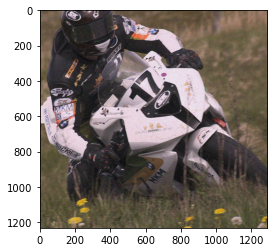

In [14]:
#Raw data
selected_image = IMAGE_LIST[6300][0]
plt.imshow(selected_image)

# Print out 1. The shape of the image and 2. The image's label
print("The shape of the selected image: {}.".format(selected_image.shape))
print("The label of the selected image: {}.".format(IMAGE_LIST[6300][1]))

The shape of the selected image: (128, 128, 3).
The label of the standardized image: 3.


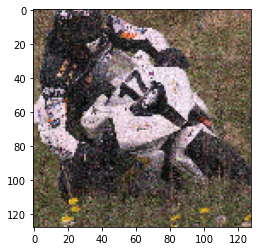

In [15]:
standardized_img = STANDARDIZED_LIST[6300][0]
plt.imshow(standardized_img)

# Print out 1. The shape of the image and 2. The image's label
print("The shape of the selected image: {}.".format(standardized_image.shape))
print("The label of the standardized image: {}.".format(STANDARDIZED_LIST[6300][1]))

The shape of the selected image: (1261, 1983, 3).
The label of the selected image: Van.


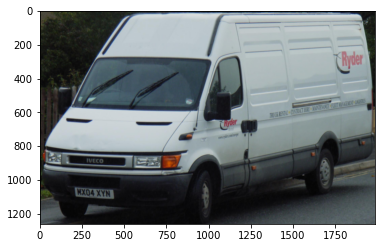

In [16]:
#Raw data
selected_image = IMAGE_LIST[8400][0]
plt.imshow(selected_image)

# Print out 1. The shape of the image and 2. The image's label
print("The shape of the selected image: {}.".format(selected_image.shape))
print("The label of the selected image: {}.".format(IMAGE_LIST[8400][1]))

The shape of the selected image: (128, 128, 3).
The label of the standardized image: 4.


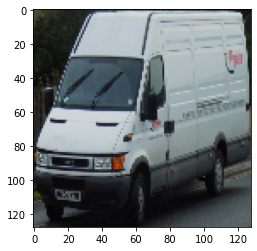

In [17]:
standardized_img = STANDARDIZED_LIST[8400][0]
plt.imshow(standardized_img)

# Print out 1. The shape of the image and 2. The image's label
print("The shape of the selected image: {}.".format(standardized_image.shape))
print("The label of the standardized image: {}.".format(STANDARDIZED_LIST[8400][1]))

In [18]:
bicycle_samples, bicycle_labels = [], []
bus_samples, bus_labels = [], []
car_samples, car_labels = [], []
motorcycle_samples, motorcycle_labels = [], []
van_samples, van_labels = [], []

for item in STANDARDIZED_LIST:
    image = item[0]
    label = item[1]
    
    if label == 0:
        bicycle_samples.append(image)
        bicycle_labels.append(label)
    elif label == 1:
        bus_samples.append(image)
        bus_labels.append(label)
    elif label == 2:
        car_samples.append(image)
        car_labels.append(label)
    elif label == 3:
        motorcycle_samples.append(image)
        motorcycle_labels.append(label)
    else:
        van_samples.append(image)
        van_labels.append(label)

### Split the dataset for training.

We import the module `train_test_split` in sklearn to split the dataset into train data and test data. By splitting the data, we get the random images from the dataset so that we have no chance of preloading the test results. We split the Bicycle, Bus, Car, Motorcycle and Van vehicle images into train and test then in the end, we concatenate them to form a combined train or test data.

In [19]:
from sklearn.model_selection import train_test_split

X_bicycle_train, X_bicycle_test, Y_bicycle_train, Y_bicycle_test = train_test_split(
    bicycle_samples,
    bicycle_labels,
    test_size=0.05,
    random_state=42
)

X_bus_train, X_bus_test, Y_bus_train, Y_bus_test = train_test_split(
    bus_samples,
    bus_labels,
    test_size=0.05,
    random_state=42
)

X_car_train, X_car_test, Y_car_train, Y_car_test = train_test_split(
    car_samples,
    car_labels,
    test_size=0.05,
    random_state=42
)

X_motorcycle_train, X_motorcycle_test, Y_motorcycle_train, Y_motorcycle_test = train_test_split(
    motorcycle_samples,
    motorcycle_labels,
    test_size=0.05,
    random_state=42
)

X_van_train, X_van_test, Y_van_train, Y_van_test = train_test_split(
    van_samples,
    van_labels,
    test_size=0.05,
    random_state=42
)

X_train = np.concatenate([X_bicycle_train, X_bus_train, X_car_train, X_motorcycle_train, X_van_train], axis=0)
Y_train = np.concatenate([Y_bicycle_train, Y_bus_train, Y_car_train, Y_motorcycle_train, Y_van_train], axis=0)

X_test = np.concatenate([X_bicycle_test, X_bus_test, X_car_test, X_motorcycle_test, X_van_test], axis=0)
Y_test = np.concatenate([Y_bicycle_test, Y_bus_test, Y_car_test, Y_motorcycle_test, Y_van_test], axis=0)

In [20]:
# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of a standardized image?
image_shape = X_train.shape[1:5]

# DONE: How many unique classes/labels there are in the dataset.
global n_classes
n_classes = 5

print("Number of training samples =", n_train)
print("Number of testing samples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
#To know the amount of data
print(X_train.shape)
print(X_test.shape)

Number of training samples = 8149
Number of testing samples = 433
Image data shape = (128, 128, 3)
Number of classes = 5
(8149, 128, 128, 3)
(433, 128, 128, 3)


In [21]:
train_classes_sizes = [np.count_nonzero(Y_train==i) for i in range(n_classes)] 
test_classes_sizes = [np.count_nonzero(Y_test==i) for i in range(n_classes)]

print(train_classes_sizes)
print(test_classes_sizes)

[1145, 1121, 3254, 1583, 1046]
[61, 60, 172, 84, 56]


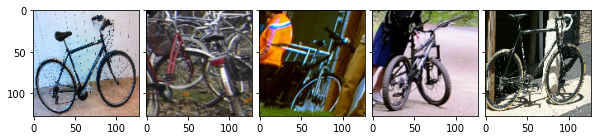

<Figure size 432x288 with 0 Axes>

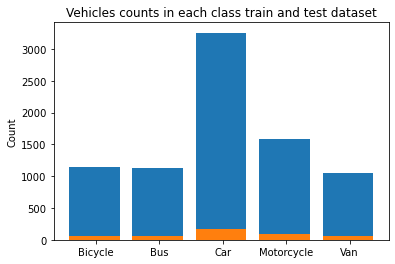

In [22]:
from mpl_toolkits.axes_grid1 import ImageGrid

def show_images_in_grid(images, rows, cols):
    fig = plt.figure (figsize=(10., 10.))
    grid = ImageGrid(fig, 111,
                     nrows_ncols=(rows, cols),
                     axes_pad=0.1
                     )
    for i in range(len(images)):
        grid[i].imshow(images [i])

    plt.show()

# table of image examples for diffetent classes
im_pos = 0
X_train_samples = []
# num_of_examples = 10
for i in range(n_classes):
    X_train_samples.append(X_train[im_pos])
    im_pos += 100

show_images_in_grid(X_train_samples, 1, n_classes)

#counts of examples in each classes
plt.figure()
plt_x = range(n_classes)
train_classes_sizes = [np.count_nonzero(Y_train==i) for i in range (n_classes)] 
test_classes_sizes = [np.count_nonzero(Y_test==i) for i in range (n_classes)] 
x = [0, 1, 2, 3, 4]
width = 0.1
fig, ax = plt.subplots()
ax.bar(plt_x, train_classes_sizes)
ax.bar(plt_x, test_classes_sizes)
ax.set_ylabel('Count')
ax.set_title('Vehicles counts in each class train and test dataset')
ax.set_xticks(np.add(x,width/4)) # set the position of the x ticks
ax.set_xticklabels(('Bicycle', 'Bus', 'Car', 'Motorcycle', 'Van'))
plt.show()

### Assigning the data:
---

We have very clear set of images which is not the case in the real life image detection. Some of the images can be cropped in few ways where the images are cut off in half way.

We create few bad images by rescaling or reshaping the images by shifting the images randomly. What is done here is the shift in height or length is done by rand.func where as we need to maintain the uniform size of the images since that is how we can confirm the images are in standardized form.

In [23]:
# rescaling of pixel magnitudes
X_train_preprocessed = np.divide(X_train, 255).astype(np.float32);
X_test_preprocessed = np.divide(X_test, 255).astype(np.float32);

# dividing into train and validation dataset

def shuffle_dataset (dataset_x, dataset_y):
    assert len(dataset_x) == len(dataset_y)
    p = np.random.permutation(len(dataset_x))
    return dataset_x[p], dataset_y[p]

def split_into_train_and_validation_dataset (dataset_x, dataset_y, train_proportion):
    train_samples_by_classes = []
    train_labels_by_classes = []
    X_train_samples = np.zeros((0, image_shape[0], image_shape[1], 3))
    Y_train_samples = np.zeros ((0,))
    X_validation_samples = np.zeros((0, image_shape[0], image_shape[1], 3))
    Y_validation_samples = np.zeros((0,))
    sample_index = 0
    for class_size in train_classes_sizes:
        train_samples_count = int(train_proportion * class_size)

        #getting and shuffle one class samples
        dataset_x_for_class = dataset_x[sample_index:sample_index + class_size]
        dataset_y_for_class = dataset_y[sample_index:sample_index + class_size]
        dataset_x_for_class, dataset_y_for_class = shuffle_dataset (dataset_x_for_class, dataset_y_for_class)
        
        #splitting to train and validation dataset
        X_train_for_class = dataset_x_for_class[0:train_samples_count]
        Y_train_for_class = dataset_y_for_class[0:train_samples_count]
        X_valid_for_class = dataset_x_for_class[train_samples_count:class_size]
        Y_valid_for_class = dataset_y_for_class[train_samples_count:class_size]
        
        #storing train samples by classes
        #this will be used later to generate augmented dataset
        train_samples_by_classes.append(X_train_for_class)
        train_labels_by_classes.append(Y_train_for_class)
        
        #storing samples in corresponding datasets
        X_train_samples = np.concatenate((X_train_samples, X_train_for_class), axis=0)
        Y_train_samples = np.concatenate((Y_train_samples, Y_train_for_class), axis=0)
        X_validation_samples = np.concatenate((X_validation_samples, X_valid_for_class), axis=0)
        Y_validation_samples = np.concatenate((Y_validation_samples, Y_valid_for_class), axis=0)
        
        sample_index += class_size
        
    return X_train_samples, Y_train_samples, X_validation_samples, Y_validation_samples, train_samples_by_classes, train_labels_by_classes

X_train_for_learning, Y_train_for_learning, X_valid_for_learning, Y_valid_for_learning, samples_by_classes, labels_by_classes = split_into_train_and_validation_dataset(X_train_preprocessed, Y_train, 0.8)

### Augmentation of the image data:
---

Data augmentation is commonly used in computer vision tasks inorder to make the machines learn and automate tasks that the human visual system can do. Data augmenation in image classification using CNN has been employed to increase the amount of of data by adding slightly modified copies of the already existing data or newly created synthetic data from existing. Augmentation acts as a regularizer and helps reduce overfitting when training a machine learning model, hence there by increasing the accuracy of the model at the cost increased time of model implementation. The data augmentation techniques that has been used in this project are the following: i) Scaling, ii) Rotation, iii) Affine Transformation, and iv) Flipping.

In [24]:
def augment_images (images, generate_count):
    images_last_index = len (images) - 1
    augmented = []
    for i in range (generate_count):
        im1 = images [rand.randint (0, images_last_index)]
        
        #rotation and scaling
        Mrot = cv2.getRotationMatrix2D((16,16),rand.uniform(-5.0, 5.0), rand.uniform(0.9, 1.1))

        #affine transformation and flipping
        pts1 = np.float32([[0,0],[image_shape[1],0],[image_shape[1], image_shape[0]]])
        a = 5;
        shift = 8
        shiftx = rand.randint (-shift, shift);
        shifty = rand.randint (-shift, shift);
        pts2 = np.float32([[
                    0 + rand.randint (-a, a) + shiftx,
                    0 + rand.randint (-a, a) + shifty
                ],[
                    image_shape[1] + rand.randint (-a, a) + shiftx,
                    0 + rand.randint (-a, a) + shifty
                ],[
                    image_shape[1] + rand.randint (-a, a) + shiftx,
                    image_shape[0] + rand.randint (-a, a) + shifty
                ]])
        M = cv2.getAffineTransform(pts1,pts2)
        (h, w) = im1.shape[:2]

        augmented_image = cv2.warpAffine(cv2.warpAffine(im1, Mrot, (w, h)), M, (w,h))
        
        augmented_image += rand.uniform(-0.2, 0.2)
        np.clip(augmented_image, 0.0, 1.0, out=augmented_image)
        
        augmented.append (augmented_image)
        
    return augmented

In [25]:
#generate images up to 2000 images for each class
#augmented dataset will contain only generated images
augment_limit = 2000
def augment_dataset ():
    global X_train_augmented
    global Y_train_augmented
    X_train_augmented = np.zeros((0, image_shape[0], image_shape[1], 3))
    Y_train_augmented = np.zeros((0,))
    
    for augmenting_index in range(n_classes):
        samples = samples_by_classes [augmenting_index]
        labels = labels_by_classes [augmenting_index]

        augment_count = augment_limit
        new_samples = augment_images (samples, augment_count)
        X_train_augmented = np.concatenate((X_train_augmented, new_samples), axis=0)
        Y_train_augmented = np.concatenate((Y_train_augmented, [augmenting_index for i in range (augment_count)]), axis=0)

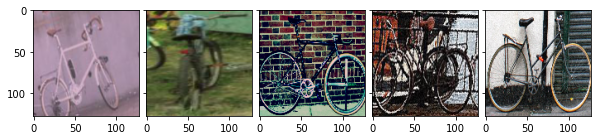

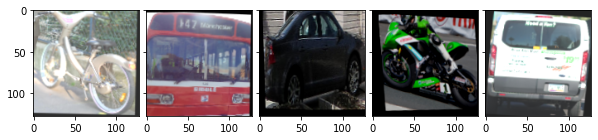

In [26]:
# showing examples of augmented dataset
show_images_in_grid([X_train_for_learning[i] for i in range(0, n_classes)], 1, 5)
augment_dataset()
show_images_in_grid([X_train_augmented[i] for i in range(0, n_classes * augment_limit, augment_limit)], 1, 5)

In [27]:
print('X_train_augmented.shape =', X_train_augmented.shape, 'Y_train_augmented.shape =', Y_train_augmented.shape)

X_train_augmented.shape = (10000, 128, 128, 3) Y_train_augmented.shape = (10000,)


### Implementation of the CNN model:

The CNN model below is similar to the code in the EDX machine learning, in which the CNN model is trained for the above defined multi-label vehicle classification dataset and tested for different model parameters.

The CNN model code is taken from the [tensorflow.org website](https://www.tensorflow.org/tutorials/images/classification) where the tensorflow.keras.Sequential model uses inbuilt loss and optimizer functions.

Apart from the Conv2D or convoultional layers and the Dense or Fully-connected layers, we have used the BatchNormalization layers, MaxPooling2D layers and Dropout layers in the CNN model inorder to increase both the training time and accuracy of the CNN model. The 3D output tensor of convolutional base is fed into one or more Dense layers to perform classification. The Dense layers take vectors as input which are 1D, while the output received from convolutional base is a 3D tensor. In this case, a Flatten layer is used to unroll the 3D output tensor to 1D. The last Dense layer takes number of classes as units which is equal to 5 since there are five different classes of vehicles loaded for classification.

Proven researches reveal that ReLU activation function as the most effective among other activation functions for image classification using convolutional neural networks, and softmax as the most effective activation function that can be used in the last fully-connected layer among other for multi-label image classification problem. In general, the sparse categorical cross entropy loss function will be employed whenever there are two or more labeled classes.

In [28]:
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (8, 8), activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(layers.BatchNormalization(center = True, scale = False))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (8, 8), activation='relu', padding='same'))
model.add(layers.BatchNormalization(center = True, scale = False))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (8, 8), activation='relu', padding='same'))
model.add(layers.BatchNormalization(center = True, scale = False))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(256, (8, 8), activation='relu', padding='same'))
model.add(layers.BatchNormalization(center = True, scale = False))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      6176      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     96        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        131136    
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 64)       1

### Train the model

* Training the model using the optimizers 'SGD' & 'adam' for two different learning rates 0.0001 and 0.001.

* We plot both train and validation accuracy with the increase number of epochs for training the the loaded image data of the CNN model initialized above.

In [29]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_augmented, Y_train_augmented, epochs=10, 
                    validation_data=(X_valid_for_learning, Y_valid_for_learning))

Epoch 1/10
313/313 [==============================] - 1905s 6s/step - loss: 1.6312 - accuracy: 0.3053 - val_loss: 3.1777 - val_accuracy: 0.1495
Epoch 2/10
313/313 [==============================] - 1789s 6s/step - loss: 1.2561 - accuracy: 0.4758 - val_loss: 1.7161 - val_accuracy: 0.4044
Epoch 3/10
313/313 [==============================] - 1843s 6s/step - loss: 1.0613 - accuracy: 0.5651 - val_loss: 0.9915 - val_accuracy: 0.5925
Epoch 4/10
313/313 [==============================] - 1827s 6s/step - loss: 0.9238 - accuracy: 0.6309 - val_loss: 1.0020 - val_accuracy: 0.6054
Epoch 5/10
313/313 [==============================] - 1818s 6s/step - loss: 0.7855 - accuracy: 0.6958 - val_loss: 1.0942 - val_accuracy: 0.5956
Epoch 6/10
313/313 [==============================] - 1860s 6s/step - loss: 0.6693 - accuracy: 0.7408 - val_loss: 0.8498 - val_accuracy: 0.7053
Epoch 7/10
313/313 [==============================] - 1868s 6s/step - loss: 0.5756 - accuracy: 0.7875 - val_loss: 1.0942 - val_accuracy:

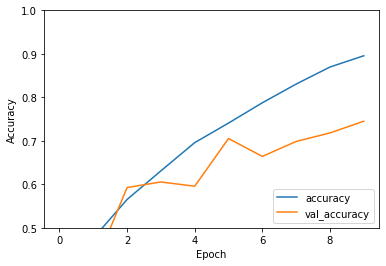

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [31]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)

14/14 - 27s - loss: 53.9413 - accuracy: 0.6351 - 27s/epoch - 2s/step


In [32]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_augmented, Y_train_augmented, epochs=10, 
                    validation_data=(X_valid_for_learning, Y_valid_for_learning))

Epoch 1/10
313/313 [==============================] - 1557s 5s/step - loss: 1.2792 - accuracy: 0.4886 - val_loss: 1.0162 - val_accuracy: 0.5931
Epoch 2/10
313/313 [==============================] - 1505s 5s/step - loss: 0.9169 - accuracy: 0.6384 - val_loss: 0.8102 - val_accuracy: 0.6912
Epoch 3/10
313/313 [==============================] - 1449s 5s/step - loss: 0.7428 - accuracy: 0.7188 - val_loss: 0.8416 - val_accuracy: 0.6648
Epoch 4/10
313/313 [==============================] - 1443s 5s/step - loss: 0.5785 - accuracy: 0.7909 - val_loss: 0.9744 - val_accuracy: 0.6366
Epoch 5/10
313/313 [==============================] - 1439s 5s/step - loss: 0.4824 - accuracy: 0.8313 - val_loss: 0.8400 - val_accuracy: 0.7690
Epoch 6/10
313/313 [==============================] - 1435s 5s/step - loss: 0.3824 - accuracy: 0.8668 - val_loss: 0.7204 - val_accuracy: 0.7776
Epoch 7/10
313/313 [==============================] - 1426s 5s/step - loss: 0.3268 - accuracy: 0.8907 - val_loss: 0.8161 - val_accuracy:

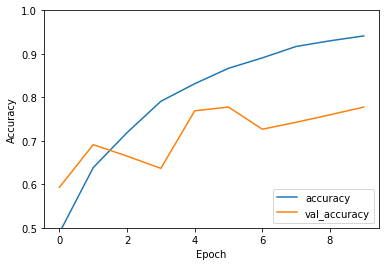

In [33]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [34]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)

14/14 - 22s - loss: 44.6377 - accuracy: 0.6189 - 22s/epoch - 2s/step


In [35]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_augmented, Y_train_augmented, epochs=10, 
                    validation_data=(X_valid_for_learning, Y_valid_for_learning))

Epoch 1/10
313/313 [==============================] - 1455s 5s/step - loss: 0.1286 - accuracy: 0.9646 - val_loss: 0.7829 - val_accuracy: 0.7831
Epoch 2/10
313/313 [==============================] - 1442s 5s/step - loss: 0.1246 - accuracy: 0.9657 - val_loss: 0.7855 - val_accuracy: 0.7843
Epoch 3/10
313/313 [==============================] - 1431s 5s/step - loss: 0.1242 - accuracy: 0.9671 - val_loss: 0.7852 - val_accuracy: 0.7837
Epoch 4/10
313/313 [==============================] - 1424s 5s/step - loss: 0.1238 - accuracy: 0.9676 - val_loss: 0.7872 - val_accuracy: 0.7862
Epoch 5/10
313/313 [==============================] - 1415s 5s/step - loss: 0.1220 - accuracy: 0.9647 - val_loss: 0.7921 - val_accuracy: 0.7862
Epoch 6/10
313/313 [==============================] - 1416s 5s/step - loss: 0.1127 - accuracy: 0.9696 - val_loss: 0.7928 - val_accuracy: 0.7862
Epoch 7/10
313/313 [==============================] - 1417s 5s/step - loss: 0.1140 - accuracy: 0.9670 - val_loss: 0.7985 - val_accuracy:

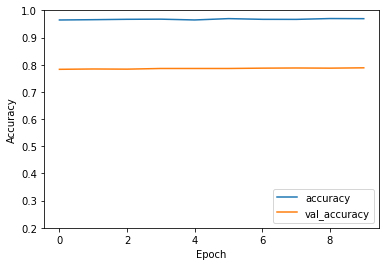

In [36]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

In [37]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)

14/14 - 21s - loss: 40.8124 - accuracy: 0.6628 - 21s/epoch - 1s/step


In [38]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_augmented, Y_train_augmented, epochs=10, 
                    validation_data=(X_valid_for_learning, Y_valid_for_learning))

Epoch 1/10
313/313 [==============================] - 1411s 4s/step - loss: 0.1066 - accuracy: 0.9689 - val_loss: 0.8583 - val_accuracy: 0.7892
Epoch 2/10
313/313 [==============================] - 1394s 4s/step - loss: 0.1047 - accuracy: 0.9702 - val_loss: 0.8499 - val_accuracy: 0.7929
Epoch 3/10
313/313 [==============================] - 1396s 4s/step - loss: 0.0987 - accuracy: 0.9709 - val_loss: 0.8633 - val_accuracy: 0.7941
Epoch 4/10
313/313 [==============================] - 1396s 4s/step - loss: 0.0940 - accuracy: 0.9715 - val_loss: 0.8902 - val_accuracy: 0.7904
Epoch 5/10
313/313 [==============================] - 1396s 4s/step - loss: 0.0911 - accuracy: 0.9734 - val_loss: 0.8801 - val_accuracy: 0.7941
Epoch 6/10
313/313 [==============================] - 1395s 4s/step - loss: 0.0868 - accuracy: 0.9767 - val_loss: 0.9209 - val_accuracy: 0.7917
Epoch 7/10
313/313 [==============================] - 1389s 4s/step - loss: 0.0859 - accuracy: 0.9746 - val_loss: 0.9227 - val_accuracy:

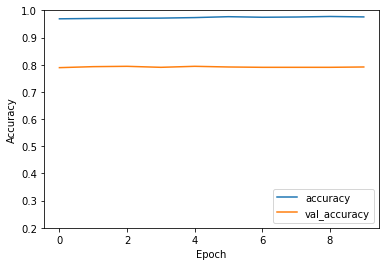

In [39]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

In [40]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)

14/14 - 21s - loss: 53.8281 - accuracy: 0.6744 - 21s/epoch - 1s/step


## Observations:

1) On carrying out experiments using the two different optimizer functions that has been taught in class, we found that the SGD optimizer function produces a slightly higher test accuracies for both learning rates 0.0001 and 0.001 compared to the ADAM optimizer function.

2) Moreover, the SGD optimizer function produces saturated train and validation accuracies for two different learning rates 0.0001 and 0.001 in which the later configuration produces the best result in terms of accuracy when taking into account all four different model training configurations.

3) Though both the optimizer functions end up producing almost same result with longer epochs, SGD tend to be more reliable for the image dataset loaded compared to ADAM, since the ADAM optimizer does not produce saturated or linearly increasing train and validation accuracies.

4) One other important observation made on training the CNN model is that the SGD optimizer function implements the CNN model slightly faster compared to the ADAM optimizer function.

5) In general, if the learning rate is less then the training time of the model will be more than usual but the machine will have a much deeper understanding on the model and hence produces higher accuracy. But, in this project the highest test accuracy of 67.44% is achieved when SGD optimizer function is used for a learning rate of 0.001. Whereas for the same SGD optimizer function with a learning rate of 0.0001, the test accuracy we achieved is 66.28%.

6) When employing the ADAM optimizer for two different learning rates 0.0001 and 0.001, the test acccuracies we achieved are 63.51% and 61.89%, where the former takes more execution time and the later gives the least test accuracy among the four different configurations for which the model has been trained.

## Classification of Vehicles:

Until now we have tested the model based on the train data. Now we take the data in image form and classify as Bicycle, Bus, Car, Motorcycle or Van with the test data. With this we can take any vehicle image class and convert it to label_encoded form for the purpose of classification.

Firstly we try to classify a single random image format the data. Once we are successful we continue to iterate the code through all the image data. The most important criteria for the vehicle classification is that all five different classes of vehicles should not be classified as vehicles from other class. **For instance, a Car should not be classified as a Bus or a Van or vice versa, and a Bicycle should not be classified as a Motorcycle or vice versa.**

The cases where the augmented images tend to get misclassified we need to make sure that those results need to be displayed in red **for instance, if the image of Car results in Van or Bicycle results in Motorcycle and vice versa then the result will be displayed in red as misclassified**, whereas the images that are properly classified will be displayed in green. For all this cases, we have written a test function code above which checks whether a car or a bus or a van is classified under other vehicle classes & vice vera, and a bicycle is classified as a motorcycle & vice versa. 

***The aim of this section is to classify the five different classes of vehicles namely Bicycle, Bus, Car, Motorcycle and Van with higher accuracy.***

In [140]:
def vehicle_label(label):
    if label == 0:
        return 'Bicycle'
    elif label == 1:
        return 'Bus'
    elif label == 2:
        return 'Car'
    elif label == 3:
        return 'Motorcycle'
    else:
        return 'Van'    
    
def estimate_label(rgb_image):

    # Standardize image imput
    dst = cv2.resize(rgb_image, (128, 128), interpolation=cv2.INTER_CUBIC)

    picture = dst.reshape(1, 128, 128, 3)
    
    picture = np.array(picture, dtype=np.float64)
    
    predicted_label = model.predict(picture)
    
    score = tf.nn.softmax(predicted_label[0])
    
    return np.argmax(score)   

Bicycle


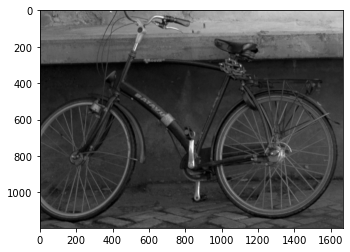

In [141]:
# test 1
test_image = IMAGE_LIST[1200][0]
plt.imshow(test_image)

print(vehicle_label(estimate_label(test_image)))

Motorcycle


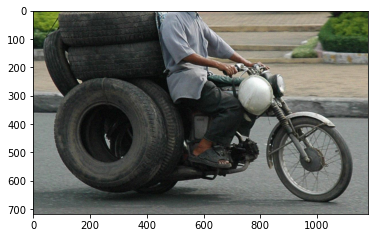

In [142]:
# test 2
test_image = IMAGE_LIST[7450][0]
plt.imshow(test_image)

print(vehicle_label(estimate_label(test_image)))

Car


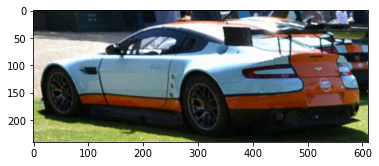

In [143]:
# test 3
test_image = IMAGE_LIST[5780][0]
plt.imshow(test_image)

print(vehicle_label(estimate_label(test_image)))

Van


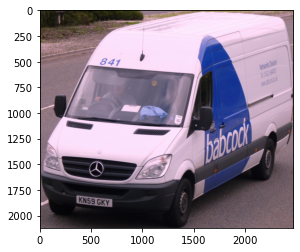

In [144]:
# test 4
test_image = IMAGE_LIST[8580][0]
plt.imshow(test_image)

print(vehicle_label(estimate_label(test_image)))

In [145]:
test_data = "C:/Users/kiran/Downloads/testset/" 

### Test dataset:

Below, we load in the test dataset, standardize it using the standardize function you defined above, and then **shuffle** it; this ensures that order will not play a role in testing accuracy.

Compare the output of your CNN model with the true labels and determine the accuracy.

This code stores all the misclassified images, their predicted labels, and their true labels, in a list called MISCLASSIFIED. This code is used for testing and should not be changed.

In [146]:
# Load test data
TEST_IMAGE_LIST = load_dataset(test_data)

# Standardize the test data
STANDARDIZED_TEST_LIST = standardize(TEST_IMAGE_LIST)

# Shuffle the standardized test data
rand.shuffle(STANDARDIZED_TEST_LIST)
print("There are {} images in all.".format(len(TEST_IMAGE_LIST)))

There are 1810 images in all.


In [147]:
from termcolor import colored # for the coloured print of the test results.

# Constructs a list of misclassified images given a list of test images and their labels
def get_misclassified_images(test_images):
    # Track misclassified images by placing them into a list
    misclassified_images_labels = []

    # Iterate through all the test images
    # Classify each image and compare to the true label
    for image in test_images:

        # Get true data
        im = image[0]
        true_label = image[1]

        # Get predicted label from your classifier
        predicted_label = estimate_label(im)

        # Compare true and predicted labels 
        if(predicted_label != true_label):
            print(colored("True label: {} &  Predicted label: {} \n".format(colour_label(true_label),colour_label(predicted_label)),'red'))
            print(colored("***MISSCLASSIFIED***\n",'red'))
            # If these labels are not equal, the image has been misclassified
            misclassified_images_labels.append((im, predicted_label, true_label))
        else:
            print(colored("True label: {} &  Predicted label: {} \n".format(colour_label(true_label),colour_label(predicted_label)),'green'))

    # Return the list of misclassified [image, predicted_label, true_label] values
    return misclassified_images_labels

# Find all misclassified images in a given test set
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

# Accuracy calculations
total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = (num_correct/total) * 100

True label: Car &  Predicted label: Car 

True label: Bus &  Predicted label: Bus 

True label: Motorcycle &  Predicted label: Motorcycle 

True label: Car &  Predicted label: Car 

True label: Bus &  Predicted label: Bus 

True label: Car &  Predicted label: Van 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Motorcycle &  Predicted label: Motorcycle 

True label: Motorcycle &  Predicted label: Motorcycle 

True label: Bus &  Predicted label: Bus 

True label: Van &  Predicted label: Car 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Bus &  Predicted label: Bus 

True label: Car &  Predicted label: Car 

True label: Motorcycle &  Predicted label: Motorcycle 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car & 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Bus &  Predicted label: Bus 

True label: Car &  Predicted label: Motorcycle 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Van 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Motorcycle &  Predicted label: Car 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Car 

True label: Motorcycle &  Predicted label: Car 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Motorcycle 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Car 

True label: Motorcycle &  Predicted label: Car 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Bus 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: B

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Bus &  Predicted label: Bus 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Van 

***MISSCLASSIFIED***

True label: Motorcycle &  Predicted label: Motorcycle 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Bus &  Predicted label: Bus 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Bus &  Predicted label: Bus 

True label: Van &  Predicted label: Bus 

***MISSCLASSIFIED***

True label: Motorcycle &  Predicted label: Motorcycle 

True label: Motorcycle &  Predicted label: Motorcycle 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Bus &  Predicted lab

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Bus 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Motorcycle &  Predicted label: Motorcycle 

True label: Car &  Predicted label: Bus 

***MISSCLASSIFIED***

True label: Motorcycle &  Predicted label: Motorcycle 

True label: Car &  Predicted label: Car 

True label: Bus &  Predicted label: Bus 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Bus &  Predicted label: Bus 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Van 

***M

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Motorcycle 

***MISSCLASSIFIED***

True label: Motorcycle &  Predicted label: Car 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Bus &  Predicted label: Bus 

True label: Bus &  Predicted label: Bus 

True label: Car &  Predicted label: Car 

True label: Bus &  Predicted label: Bus 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Bicycle &  Predicted label: Bicycle 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Motorcycle &  Predicted label: Car 

***

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Van 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Bus 

***MISSCLASSIFIED***

True label: Motorcycle &  Predicted label: Motorcycle 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Bus &  Predicted label: Car 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Bus 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Bus 

***MISSCLASSIFIE

True label: Car &  Predicted label: Van 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Bus 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Van &  Predicted label: Van 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Bicycle &  Predicted label: Bicycle 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Bus &  Predicted label: Van 

***MISSCLASSIFIED***

True label: Bicycle &  Predicted label: Car 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Bicycl

True label: Motorcycle &  Predicted label: Motorcycle 

True label: Car &  Predicted label: Car 

True label: Van &  Predicted label: Van 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Bus &  Predicted label: Bus 

True label: Car &  Predicted label: Car 

True label: Bicycle &  Predicted label: Motorcycle 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Van 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Bicycle &  Predicted label: Bicycle 

True label: Car &  Predicted label: Bus 

***MISSCLASSIFIED***

True label: Motorcycle &  Predicted label: Motorcycle 

True label: Bicycle &  Predicted label: Bicycle

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Motorcycle &  Predicted label: Bicycle 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Bus 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Van 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Bus 

***MISSCLASSIFIED***

True label: Motorcycle &  Predicted label: Motorcycle 

True label: Car &  Predicted label: Car 

True label: Bicycle &  Predicted label: Car 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Motorcycle &  Predicted label: Motorcycle 

True la

True label: Car &  Predicted label: Bus 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Bus 

***MISSCLASSIFIED***

True label: Bus &  Predicted label: Bus 

True label: Car &  Predicted label: Bus 

***MISSCLASSIFIED***

True label: Bicycle &  Predicted label: Car 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Bicycle &  Predicted label: Bus 

***MISSCLASSIFIED***

True label: Motorcycle &  Predicted label: Motorcycle 

True label: Van &  Predicted label: Car 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Bus 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Bus &  Predicted label: Bus 

True label: Car &  Predict

True label: Car &  Predicted label: Bus 

***MISSCLASSIFIED***

True label: Bicycle &  Predicted label: Car 

***MISSCLASSIFIED***

True label: Van &  Predicted label: Van 

True label: Car &  Predicted label: Car 

True label: Motorcycle &  Predicted label: Motorcycle 

True label: Car &  Predicted label: Bus 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Car 

True label: Motorcycle &  Predicted label: Motorcycle 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Bus 

***MISSCLASSIFIED***

True label: Motorcycle &  Predicted label: Bus 

***MISSCLASSIFIED***

True label: Motorcycle &  Predicted label: Motorcycle 

True label: Van &  Predicted label: Car 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Car 

True label: Motorcycle &  Predicted label: Bus 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Car 

True label: Motorcycle &  Predicted label: Bus 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Car 

T

True label: Bicycle &  Predicted label: Bus 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Motorcycle &  Predicted label: Motorcycle 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Motorcycle &  Predicted label: Motorcycle 

True label: Car &  Predicted label: Car 

True label: Bicycle &  Predicted label: Bicycle 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Van 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Van &  Predicted label: Van 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Motorcycle &  Predicted label: Bus 

***MISSCLASSIFIED***

True 

True label: Car &  Predicted label: Car 

True label: Van &  Predicted label: Bus 

***MISSCLASSIFIED***

True label: Motorcycle &  Predicted label: Motorcycle 

True label: Car &  Predicted label: Motorcycle 

***MISSCLASSIFIED***

True label: Bicycle &  Predicted label: Motorcycle 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Bus &  Predicted label: Bus 

True label: Bicycle &  Predicted label: Bicycle 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Bus 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Motorcycle &  Predicted label: Car 

***MISSCLASSIFIED***

Tru

True label: Bus &  Predicted label: Bus 

True label: Car &  Predicted label: Car 

True label: Bicycle &  Predicted label: Bicycle 

True label: Bicycle &  Predicted label: Motorcycle 

***MISSCLASSIFIED***

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Bicycle &  Predicted label: Bicycle 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 

True label: Car &  Predicted label: Car 



In [148]:
print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))

Accuracy: 77.51381215469614
Number of misclassified images = 407 out of 1810


The Predicted label of the misclassified image: Car


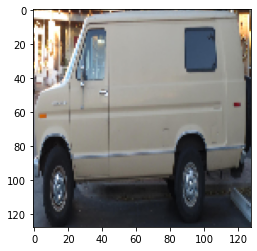

In [149]:
selected_image = MISCLASSIFIED[1][0]
plt.imshow(selected_image)

print("The Predicted label of the misclassified image: {}".format(vehicle_label(MISCLASSIFIED[1][1])))

The Predicted label of the misclassified image: Van


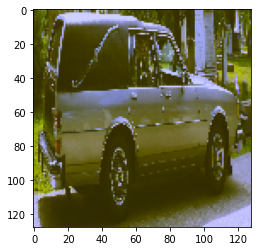

In [150]:
selected_image = MISCLASSIFIED[5][0]
plt.imshow(selected_image)

print("The Predicted label of the misclassified image: {}".format(vehicle_label(MISCLASSIFIED[5][1])))

## Observations made on Classification of the Vehicles:

i) The accuracy obtained on classification of the vehicles **is greater than 75%** for the test data loaded.

ii) Based on the results we can see that the produced accuracy is acceptable for most of the images and is not accurate only for the images which are blur or cropped or have high exposure which results in the misclasification of the images.

iii) As we can see above, the image of the Van is cropped and as a result the trained CNN model predicts the vehicle to be a Car instead of Van, and in the next image, the image of the Car has high exposure and also slightly blurred as a result of standardization hence the trained CNN model predicts the vehicle to be a Van instead of Car.

## Conclusion:

**Jaya Vignesh Balakrishnan:** Being from civil engineering background, I was initially struggling with python coding, but I have made progress in the following weeks of the course and started debugging all the errors that I have encountered in this project. While working on this project, I struggled a lot to find the right kind of dataset for this project. After downloading the dataset, I have made modifications considering memory-related constraints since both the train and test data constitutes 10.0 GB of memory space combined.

**Kirankumar Raveendiran:** Being from electrical engineering background, I have learned the two major concepts I have learned on doing this project are the techniques used for the classification of vehicle dataset namely data augmentation and convolutional neural networks (CNN) in which I found difiiculties in learning the concept of data augmentation and writing the appropriate python code for the same.

### References and Summary of the resource papers:

* S. Indolia, A.K. Goswami, S.P. Mishra, P. Asopa, 'Conceptual Understanding of Convolutional Neural Network - A Deep Learning Approach Procedia Computer Science', 132 (2018), [Understanding Convolutional Neural Network](https://www.sciencedirect.com/science/article/pii/S1877050918308019)
* S. Albawi, T. A. Mohammed and S. Al-Zawi, 'Understanding of a convolutional neural network', Engineering and Technology (ICET) 2017 International Conference on. IEEE, pp. 1-6, 2017, [Convolutional Neural Network](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8308186)
* Neha Sharma, Vibhor Jain, Anju Mishra, 'An analysis of Convolutional Neural Networks for Image Classification', International Conference on Computational Intelligence and Data Science (ICCIDS 2018), [An analysis of Convolutional Neural Networks for Image Classification](https://www.researchgate.net/publication/325663368_An_Analysis_Of_Convolutional_Neural_Networks_For_Image_Classification)
* N. Jmour, S. Zayen and A. Abdelkrim, 'Convolutional neural networks for image classification', 2018 International Conference on Advanced Systems and Electric Technologies (IC_ASET), pp. 397-402, 2018, [Convolutional Neural Networks for Image Classification](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8379889)
* Bensedik Hicham, Azough Ahmed, Meknasssi Mohammed, 'Vehicle Type Classification Using Convolutional Neural Network', [Vehicle Type Classification Using Convolutional Neural Network](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8596500)

Machine learning promises to save time and effort by allowing machines to learn from their prior experiences utilizing three different learning approaches: Supervised learning, Unsupervised learning, and Semi-supervised learning. Traditional machine learning algorithms need feature extraction, which necessitates the assistance of a domain expert. Furthermore, choosing the right characteristics for a specific situation is a difficult process. Deep learning approaches solve the problem of feature selection by automatically extracting relevant characteristics from raw input rather than requiring pre-selected features. A deep learning model is made up of a series of processing layers that may learn various data characteristics at different degrees of abstraction. The network may learn different characteristics at different levels. Deep learning has emerged as a promising method for achieving promising results in a variety of applications, including image recognition, speech recognition, topic classification, sentiment analysis, language translation, natural language understanding, signal processing, face recognition, and small molecule bioactivity prediction. Deep learning architectures include deep belief networks, recurrent neural networks, and convolutional neural networks, among others.

Over the last decade, Convolutional Neural Networks have achieved breakthroughs in a range of pattern recognition domains, ranging from image processing to speech recognition. The most advantageous feature of CNNs is that they reduce the number of parameters in  artificial neural networks (ANN). This accomplishment has motivated academics and developers to consider bigger models in order to perform challenging tasks that were previously impossible to solve with traditional ANNs. 

The most significant assumption regarding issues handled by CNN is that they should not contain spatially dependent properties. To put it another way, in a face detection application, we don't need to worry about where the faces are in the images. The only thing that matters is that they be detected, regardless of their position in the given images. Another essential property of CNN is the ability to extract abstract features when input propagates deeper levels. In image classification, for example, the edge may be recognized in the first layers, followed by simpler shapes in the second layers, and finally higher-level characteristics like faces in the third layers.

Deep learning, specifically convolutional neural networks (CNN), has piqued interest in the field of computer vision, and particularly in image classification. Convolution Neural Network (CNN), often known as ConvNet, is a deep feed-forward network with a remarkable capacity to generalise when compared to networks with completely connected layers. CNN is defined as a biologically inspired notion of hierarchical feature detectors where its design is based on the biological brain's main visual cortex treatment procedure. It is capable of learning very abstract traits and accurately identifying things. The following are some of the significant reasons why CNN is preferred above other traditional methods. First, the key interest for applying CNN lies in the idea of using concept of weight sharing, due to which the number of parameters that needs training is substantially reduced, resulting in improved generalization. CNN can be trained smoothly and without overfitting because of the fewer parameters. Second, the classification step is combined with the feature extraction stage, both of which are based on learning. Third, constructing big networks utilising generic models of artificial neural networks (ANN) is far more complex than implementing in CNN. 

Due to their exceptional performance, CNNs are widely employed in a variety of fields, including image classification, object identification, face detection, voice recognition, vehicle recognition, diabetic retinopathy, facial expression recognition, and many more. The goal of this research is to provide a theoretical framework while also expanding our knowledge and comprehension of CNN. A general model of CNN consists of four components namely (a) convolution layer, (b) pooling layer, (c) activation function, and (d) fully connected layer. 

The convolutional layer receives a picture to be categorized, and the predicted class label is generated using extracted features from the image. The local association between an individual neuron in the next layer and certain neurons in the preceding layer is known as the receptive field. Receptive field is used to extract local characteristics from the input picture. A weight vector is formed by the receptive field of a neuron connected with a specific area in the previous layer, which stays equal at all places on the plane, where plane refers to the neurons in the next layer. The comparable characteristics happening at different locations in the input data may be identified since the neurons in plane have the same weights. The feature map is created by sliding the weight vector, also known as the filter or kernel, across the input vector. Convolution operation refers to the procedure of moving the filter horizontally as well as vertically. This process collects N number of features from the input picture in a single layer, resulting in N filters and N feature maps. The number of trainable parameters is greatly decreased due to the phenomena of local receptive field. In which, the strides in convolutional layer signifies how number of pixels shifts over the input matrix. When the stride is 1 then we move the filters to 1 pixel at a time. When the stride is 2 then we move the filters to 2 pixels at a time. Another important hyperparameter of convolutional layer is padding which controls the output volume. Sometimes filter does not fit perfectly fit the input image then there are two options one is zero-padding where padding is done with zeros so that it fits the image, another one valid-padding which keeps only valid part of the image and drops the part of the image where the filter did not fit

Once a feature has been discovered, its specific placement becomes less important. As a result, the pooling or sub-sampling layer comes after the convolution layer. The main benefit of utilising the pooling strategy is that it significantly decreases the number of trainable parameters while also introducing translation invariance. A window is chosen for the pooling procedure, and the input components inside that window are sent through a pooling function to generate another output vector. There are a few pooling approaches available, such as average pooling and max-pooling, with max-pooling being the most widely utilized and resulting in a large reduction in map size. Because it does not participate in forward flow, the error is not back-propagated to the winning unit when computing errors.

In conventional models, the completely connected layer is identical to the fully linked network. The output of the first phase (which involves repeated convolution and pooling) is sent into the fully connected layer, which computes the dot product of the weight vector and the input vector to generate the final output. Gradient descent, also known as batch mode learning or the offline algorithm, minimises the cost function by calculating the cost over an entire training dataset and updating the parameters just once every epoch. It produces global minima, but if the training dataset is huge, the time it takes to train the network skyrockets. Stochastic Gradient Descent (SGD) was used to replace this method of cost function reduction.

Moving forward, the consideration of activation function that need to be used in all the layers mentioned above it has been found that there is a large body of work that employs the sigmoid activation function in traditional machine learning techniques. In order to introduce non-linearity, use of Rectified Linear Unit (ReLU) has proved itself better than the former,
because of two major factors. First, calculation of partial derivative of ReLU is easy. Second, when training time is taken into account, saturating non-linearities such as sigmoid are faster than non-saturating non-linearities such as ReLU. Third, ReLU
does not allow gradients to disappear. But efficiency of ReLU deteriorates when a large gradient is flowing through the network, and update in weight causes the neuron not to get activated leading to Dying ReLU problem which is a considerable issue that is often caused and this issue can be solved using Leaky ReLU.

Learning algorithms, also known as optimising algorithms, benefit the network by minimizing the objective function (also known as the loss function E(x)), which is based on many learnable parameters like as weight, bias, and so on. First order optimization algorithms and second order optimization algorithms are the two most common types of optimization algorithms. Gradient Descent is a frequently used approach in First Order Optimization, which involves computing the gradient represented by a Jacobian matrix. Gradient Descent comes in a variety of flavours, including Mini Batch Gradient Descent and Stochastic Gradient Descent. Improvements have been made in the versions such as the inclusion of momentum, Adagrad, and AdaDelta in attempt to enhance outcomes. Second Order Optimization, on the other hand, includes the second order derivative, which is represented by the Hessian Matrix. Adam Optimization is one such approach.

Error backpropagation is the method utilised in Gradient Descent during training the filters to adjust the pre-initialized parameters of a network to reach the optimum network parameters that can provide outputs that are close to target outputs. Error-backpropagation can be used in CNN to create such a network. Because the total network is a feed forward network, the method begins by computing the outputs at each layer one at a time, then calculating the error component added on the final layer. The obtained gradients are now backpropagated in order to produce an optimal network. The procedure is repeated until the effectiveness is determined.

Gradient Descent is useful in situations when the function is easily differentiable in relation to the network parameters. According to a study, minimising continuous functions is easier than minimizing discrete functions. After one epoch, the weight update is conducted, where one epoch represents going through the complete dataset. This approach delivers acceptable results, but it degrades and does not converge effectively as the training dataset grows larger. In the case of several local minima, it may not lead to a global minimum. This flaw is solved by stochastic gradient descent, which selects data samples at random and updates parameters depending on the cost function. It also converges quicker than traditional gradient descent and saves memory by avoiding the accumulation of intermediate weights. Adaptive Moment Estimation (ADAM) uses the first and second moments of gradient to compute learning rates for each parameter. ADAM uses less memory and outperforms on huge datasets since it is computationally efficient. Another key benefit addressed in the ADAM paper is that parameter updating is absolutely invariant to gradient rescaling, which means that the method will converge even if the objective function changes over time. The disadvantage of this method is that it necessitates the computation of the second order derivative, which increases the cost.

The proliferation of images and videos on the internet today is promoting the creation of search applications and algorithms that can explore the semantic analysis of images and videos in order to provide better search content and summarization to users. Researchers from all over the world have announced major breakthroughs in image marking, object identification, and scene classification. A crucial step in such algorithms is feature extraction. Scale-invariant feature transform (SIFT), histogram of directed gradients (HOG), Local binary patterns (LBP), Content-Based Image Retrieval (CBIR), and others are some of the traditional feature extraction techniques used on images. Once features have been removed, they are classified based on the objects present in the image. Support vector machine (SVM), Logistic Regression, Random Forest, decision trees, and other classifiers are a few examples.

An empirical analysis of the performance of popular convolution neural network (CNN) for identifying object in real time video feeds. The most popular convolutional neural networks for object detection and object category classification from images are Alex Nets, GoogLeNet, and ResNet50. N from images is Alex Nets, GoogLeNet, and ResNet50. A variety of image data sets are available to test the performance of different types of CNN's. GoogLeNet and Res net50 can recognize objects with better precision compared to Alex Net. The performance of trained CNN's varies substantially across different categories of objects. It must be noted that videos are not used as a training dataset, they are used as testing datasets.

CNN has been providing a collection of templates that can be used to better understand the contents of an image. In many pattern and image recognition applications, CNNs are used easily and effectively. The successful integration of all the above applications is due to advances and advancement in deep network learning algorithms, as well as, to a lesser extent, the open source wide labeled data set available for experimentation. When such comparisons are made on a broad data set such as Image-Net, CIFAR-10, 100, 100, etc., it is important to note that neural network classification and prediction accuracy and error rates are all most comparable to those of humans. This work aims at analyzing the capability of convolutional neural networks to categories the scene in videos based on identified objects. A variety of image categories are included in CIFAR-100, CifAR 10 and ImageNet datasets for training the CNN. The test datasets are videos of different categories and subjects. These networks are constructed using existing neural networks. Each of these networks have different layers, therefore their performance varies considerably. Using complex real-world scenes, the detection accuracy of the network can be checked. The results can be compared to that of humans when such comparisons are made on a large data set such as Image-Net, CIFar-10, 100 etc.

There are a variety of smart pre-trained CNNs available, all of which are capable of transfer learning. However, as we go further, neural network training becomes more complicated, and accuracy begins to saturate and then degrade. Residual Learning aims to address all of these issues. It has been shown that training these networks is less difficult than training simple deep convolutional neural networks. The issue of deteriorating accuracy has been resolved. AlexNets, Google Nets, and ResNet50 are the three existing neural networks that are compared. The transfer learning principles were then used to train these networks and generate new networks for comparison.

CIFAR-100 is an image dataset with a variety of super-classes of general object images and subclass categories for each superclass. The second dataset was ImageNet, which contains super-classes of images that are further subdivided into subclasses. Abed, bicycle, bus, chair, sofa, motorcycle, streetcar, table, train, and train are the categories selected for training and testing. Household furniture and car are the super classes that are used. The categories that were selected are listed in the table below. Each definition in WordNet is represented by a "synonym set" or "sync set" of terms. There are over 100,000 sync sets in the dataset. Many of the photographs have been annotated by humans. For our research, we also grouped ImageNet's less descriptive labels into more meaningful sets that matched the superclass's. For instance, the word "table" was renamed "furniture," and many other images were grouped into super classes to create a more descriptive and meaningful mark. The study's third dataset was an image dataset called aCIFAR-10. The CIFAR-10 dataset contains 60000 images with 32x32 color images divided into 10 classes and 6000 images per class. The dataset is divided into five training batches and one test batch, each of which has 10000 images. The test images are randomly-selected from each class.

CNNs for image categorization usually follow a similar pattern: a sequence of convolution and subsampling operations to extract image features, followed by a completely connected layer to perform final labeling. Because of the large size of remote sensing data, training and inference are done patch-by-patch. To account for the surrounding background and make more reliable predictions, the output patch gets smaller and smaller, based in the input patch. In our issue, we need a dense classification as an output, not just a single categorization for the entire image, but a complete pixel-by-pixel labeling into the various categories. Increase the number of outputs of the fully linked classification layer to match the size of the target patch to make dense predictions. The network needs 64 patches (on 64-color pansharpened images of 1m2spatial resolution) The first convolution is extended to every other fourth pixel, rather than every pixel of the first pixel. The three-dimensional network is made up of three convolutional layers. The final network is built by taking the output of the last layer and adding a sigmoid function to it. The cross-entropy on the sigmoid is the loss function used for preparation. 64 patches are needed for the network (on 64-color pansharpened images of 1m2spatial resolution) Three convolutional layers make up the three-dimensional network. The final network is constructed by applying a sigmoid feature to the output of the previous layer.

Limitations of the patch-based approach discussed above, that motivate the design of an improved architecture. In order to complete the final classification, the network learns priors on the location inside a patch. The partition of an image into patches is arbitrary in our sense, so the "in-patch position" prior is unnecessary. Every output can have different weights in relation to the previous feature map thanks to the completely connected layer. This allows the network to learn priors for a particular patch role. The network can also learn how to up sample the previous layer's function maps to the original image resolution. The layer can then be used to mark and identify the previous layer's characteristics, as well as classify and up sample them.

To make dense predictions, a completely convolutional neural network architecture (FCN) was used. The outputs of the patches are specifically restricted to be position independent in this architecture, which means they can only be the product of a series of convolutions. The following is how a classification network can be "convolutionalized." The completely connected layer that performs the classification is first rewritten as a convolutional layer. The connections are equivalent to a completely connected layer if we use a convolution kernel whose dimensions match those of the previous layer. The difference now is that if a enlarge the input image, the output size is also increased, but the number of parameters remains constant. This can be seen as convolving the whole original network around a larger image to evaluate the output at different locations. Then add a "deconvolutional" layer that learns filters to up sample the resolution to increase the resolution of the output plot. To create an output patch, a deconvolutional layer multiplies a single input by a learned filter. If the patches in the output overlap, they are simply combined to produce the result. This is a convolutional layer of inverted backward and forward passes. Advantages of the fully convolutional network are, elimination of discontinuities due to patch borders, improved accuracy due to a simplified learning process, with a smaller number of parameters and lower execution time at inference given that convolutions can enjoy the benefits of GPU processing. Every output within the output patch is located at a different location with respect to its so-called receptive field in the patch-based network (the portion of the input to which it is connected). Since this action is difficult to explain, it was pretend that the output patch is 11 instead of 16, focusing on a single focused output. The completely connected layer is then rewritten as a convolutional layer with one function map and the same spatial dimensions as the previous layer. Finally, to recover the input resolution, we add a deconvolutional layer that samples up the input by a factor of four.

This new network accepts images of various sizes as input, and the output size varies accordingly. During the training stage, the patch-based networks conduct learning by taking an input of size 80 × 80 and producing maps of size 16 × 16. Not because dealing with more context, but because and output was centered in its context, the input patch is larger than in patch-based networks. Take arbitrary-sized inputs at inference time to build classification maps. The FCN configuration was often identical, with the same number of parameters, regardless of the size of the input. The output value of each neuron from the previous layer is multiplied by a learned filter, which is “pasted” in the output with a stride of 4. Overlapping occurs due to the size 8 × 8 of the filters. The overlapping areas are added (gray) while the excess areas beyond border are excluded (white).

One of the most important challenges in modern road safety and intelligent transportation systems is the automation of vehicle categorization and recognition. To reach this goal, image processing, pattern recognition, and deep learning technologies have surmounted several challenges. In this research, we describe a deep learning-based vehicle type categorization system. There are two steps in this system. In the first stage, we use data augmentation to mitigate the problem of an imbalanced dataset. In the second stage, we use parameters obtained from the training dataset to create a convolutional neural network (CNN) model with several topologies. This technology is part of a larger system that will allow for automated traffic light control based on vehicle type identification. The growing size of the vehicle flee as well as the increased number of monitoring surveillance
cameras, it is necessary to automate the vehicle recognition in order to capture the traffic data. 

Automatic vehicle classification techniques have been used extensively. Many real-world applications, such as highway surveillance, toll collecting, traffic congestion detection, and others, may be automated using these approaches. Various approaches for vehicle categorization have been presented, with some of them proving useful in tackling constrained circumstances. Shifts in illumination, picture scale, image quality, size, and color are among the remaining issues. Deep learning-based categorization system for vehicle types. Two techniques are used to build this system: data augmentation and convolutional neural networks (CNN). This effort is part of a larger project to use deep learning to automate traffic monitoring in order to enhance road safety. This application would manage traffic lights automatically based on the detection of a certain type of vehicle, such as switching to the green light on a busy route as soon as an ambulance or police car is spotted further away in an emergency. This will allow us to create an automated road decongestion system. 

Data augmentation is widely acknowledged as a factor in increasing the performance of automated learning models. Furthermore, when working with classification tasks such as car categorization using neural networks and deep learning models, data preprocessing is required. After each pooling operation, the number of attributes for each convolution layer was doubled by a factor of two. The reason for this is that the successive layers' characteristics are richer and more semantically informative. As a result, additional feature cards are required in order to have distinct representations. We are also using data augmentation techniques for deep learning, such as random rotations, flips, and cropping, to supplement the learning data set. The intend is to focus on improving accuracy with small training samples in the future. Before merging them into a comprehensive automatic traffic monitoring system, the need to expand our system to incorporate automatic license plate recognition, vehicle counting, and traffic congestion detection modules.

In [8]:
import io
from nbformat import current
import glob
nbfile = glob.glob('Raveendiran-Project Report.ipynb')
if len(nbfile) > 1:
    print('More than one ipynb file. Using the first one.  nbfile=', nbfile)
with io.open(nbfile[0], 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')
word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print('Word count for file', nbfile[0], 'is', word_count)

Word count for file Raveendiran-Project Report.ipynb is 6300
